In [1]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchcam.methods import SmoothGradCAMpp
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask

In [18]:
# Get your input
img = read_image(r"C:\AI_project\data\ImageNet\valid\25\ILSVRC2012_val_00000225.JPEG")
# Preprocess it for your chosen model
input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [19]:
from torchvision.models import alexnet
model = alexnet(pretrained=True).eval()
out = model(input_tensor.unsqueeze(0))
out.argmax()

tensor(25)

In [68]:
cam_extractor = SmoothGradCAMpp(model, target_layer= 'layer2')
# Preprocess your data and feed it to the model
out = model(input_tensor.unsqueeze(0))
# Retrieve the CAM by passing the class index and the model output
activation_map0 = cam_extractor(out.squeeze(0).argmax().item(), out)
arr_0 = torch.stack(activation_map0,0)
arr_0.shape

torch.Size([1, 28, 28])

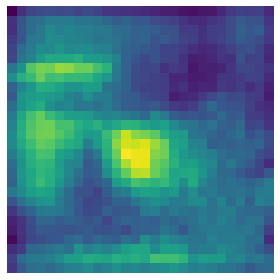

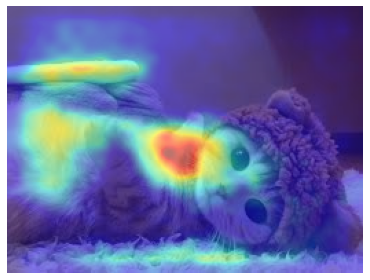

In [69]:
# Visualize the raw CAM
plt.imshow(activation_map0[0].squeeze(0).numpy()); plt.axis('off'); plt.tight_layout(); plt.show()
# Resize the CAM and overlay it
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map0[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()

In [70]:
from torchvision.models import resnet50
model_1 = resnet50(pretrained=False).eval()

In [71]:
cam_extractor = SmoothGradCAMpp(model_1, target_layer= 'layer2')
# Preprocess your data and feed it to the model
out = model_1(input_tensor.unsqueeze(0))
# Retrieve the CAM by passing the class index and the model output
activation_map1 = cam_extractor(out.squeeze(0).argmax().item(), out)
arr_1 = torch.stack(activation_map1,0)
arr_1.shape

torch.Size([1, 28, 28])

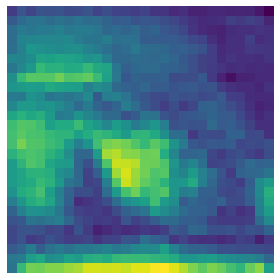

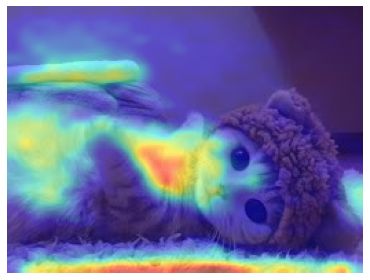

In [72]:
# Visualize the raw CAM
plt.imshow(activation_map1[0].squeeze(0).numpy()); plt.axis('off'); plt.tight_layout(); plt.show()
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map1[0].squeeze(0), mode='F'), alpha=0.5)
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()

In [84]:
from torchvision.models import resnet101
model_2 = resnet50(pretrained=True).eval()
cam_extractor = SmoothGradCAMpp(model_2, target_layer= 'layer4')
# Preprocess your data and feed it to the model
out = model_2(input_tensor.unsqueeze(0))
# Retrieve the CAM by passing the class index and the model output
activation_map2 = cam_extractor(out.squeeze(0).argmax().item(), out)
arr_2 = torch.stack(activation_map2,0)
arr_2.shape

torch.Size([1, 7, 7])

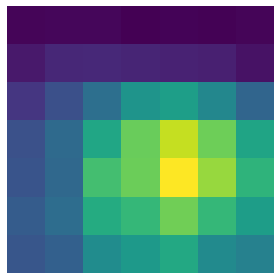

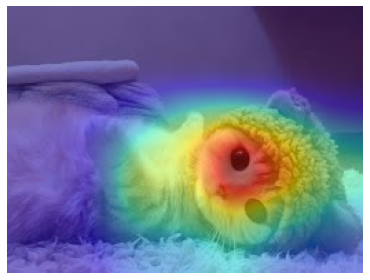

In [85]:
plt.imshow(activation_map2[0].squeeze(0).numpy()); plt.axis('off'); plt.tight_layout(); plt.show()
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map2[0].squeeze(0), mode='F'), alpha=0.5)
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()

In [75]:
similarity_01 = torch.cosine_similarity(arr_0, arr_1, dim=0)
similarity_01.sum()

tensor(782.)

In [76]:
similarity_02 = torch.cosine_similarity(arr_0, arr_2, dim=0)
similarity_02.sum()

tensor(713.)

In [77]:
similarity_12 = torch.cosine_similarity(arr_1, arr_2, dim=0)
similarity_12.sum()

tensor(713.)

In [78]:
from torchvision.models import vgg19
model_3 = vgg19(pretrained=False).eval()
cam_extractor = SmoothGradCAMpp(model_3)
# Preprocess your data and feed it to the model
out = model_3(input_tensor.unsqueeze(0))
# Retrieve the CAM by passing the class index and the model output
activation_map3 = cam_extractor(out.squeeze(0).argmax().item(), out)
arr_3 = torch.stack(activation_map3,0)
arr_3.shape

torch.Size([1, 7, 7])

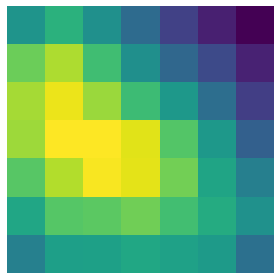

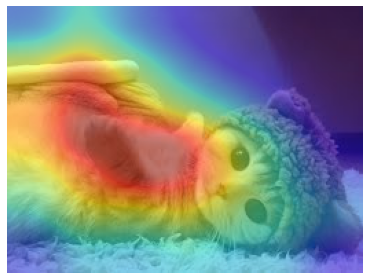

In [79]:
plt.imshow(activation_map3[0].squeeze(0).numpy()); plt.axis('off'); plt.tight_layout(); plt.show()
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map3[0].squeeze(0), mode='F'), alpha=0.5)
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()

In [80]:
similarity_23 = torch.cosine_similarity(arr_2, arr_3, dim=0)
similarity_23.sum()

RuntimeError: The size of tensor a (28) must match the size of tensor b (7) at non-singleton dimension 2